# This script can be used for comparing WRF model output with California Air Resources Board (CARB) data.
## The CARB data can be downloaded from the following link, which contains MET data across California since 1980 to present.

https://www.arb.ca.gov/aqmis2/download/met_data/met_data-20230130.zip

Written by:
Sagar P Parajuli, SDSU




In [2]:

# First read CARB station data

import pandas as pd

# Read the CSV file into a pandas DataFrame
airtemp_2020 = pd.read_csv(r'/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Station_data/otemp.2020/otemp.2020.csv')
airtemp_2020.head()

# Extract rows where county_name is equal to 'Imperial' only

airtemp_2020_imp = airtemp_2020[airtemp_2020['county_name'] == 'Imperial']
del airtemp_2020
# Extract rows where obs_type is equal to 'H' corresponding to hourly data from airtemp_2020_imp
airtemp_2020_imp_hourly = airtemp_2020_imp[airtemp_2020_imp['obs_type'] == 'H']
del airtemp_2020_imp
airtemp_2020_imp_hourly.head()

# find the unique stations inside the Imperial County, this will be used for plotting stations later

unique_county_names = airtemp_2020_imp_hourly['name'].unique()
unique_county_names

unique_stations = airtemp_2020_imp_hourly[['name', 'latitude', 'longitude']].drop_duplicates()
unique_stations




<ipython-input-2-0f7b67876b20>:6: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  airtemp_2020 = pd.read_csv(r'/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Station_data/otemp.2020/otemp.2020.csv')


,name,latitude,longitude
963762,Bombay Beach,33.352636,-115.734192
972238,Buttercup,32.739722,-114.883889
980913,Cahuilla,32.973611,-115.173611
989115,Calexico-Ethel Street,32.676180,-115.483070
1002479,El Centro-9th Street,32.792150,-115.562990
1038420,Naval Test Base,33.169226,-115.855927
1046830,Niland-English Road,33.213488,-115.545136
1064264,Salton City,33.272754,-115.900616
1081491,Sonny Bono,33.176383,-115.623100
1089908,Squaw Lake,32.908333,-114.494444


In [3]:
# Extract only April data from station data and fill date/data gaps with NaNs

#station_detail = airtemp_2020_imp_hourly_apr[airtemp_2020_imp_hourly_apr['name'] == 'Bombay Beach']

import numpy as np

from datetime import datetime

# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

mask = (airtemp_2020_imp_hourly['date'] >= start_date) & (airtemp_2020_imp_hourly['date'] <= end_date)

# Extract rows between the specified date range
airtemp_2020_imp_hourly_apr = airtemp_2020_imp_hourly.loc[mask]

airtemp_2020_imp_hourly_apr = airtemp_2020_imp_hourly_apr.copy() # this was necessary to avoid an error which didn't allow adding 'datetime' column
airtemp_2020_imp_hourly_apr['datetime'] = pd.to_datetime(airtemp_2020_imp_hourly_apr['date']) + pd.to_timedelta(airtemp_2020_imp_hourly_apr['start_hour'], unit='h')

# Resample station data to make hourly

# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

mask = (airtemp_2020_imp_hourly['date'] >= start_date) & (airtemp_2020_imp_hourly['date'] <= end_date)

# Extract rows between the specified date range
airtemp_2020_imp_hourly_apr = airtemp_2020_imp_hourly.loc[mask]
airtemp_2020_imp_hourly_apr['datetime'] = pd.to_datetime(airtemp_2020_imp_hourly_apr['date']) + pd.to_timedelta(airtemp_2020_imp_hourly_apr['start_hour'], unit='h')
airtemp_2020_imp_hourly_apr

airtemp_2020_imp_hourly_apr.set_index('datetime', inplace=True)
airtemp_2020_imp_hourly_apr

hourly_resampled_data_stns = airtemp_2020_imp_hourly_apr.groupby(['name', 'datetime'])['obs'].mean().unstack() #  it already excludes Calexico because it has no data

hourly_resampled_data_stns_array = hourly_resampled_data_stns.to_numpy()
hourly_resampled_data_stns_array = np.delete(hourly_resampled_data_stns_array, [8], axis=0) # Squawk lake deleted because it has all nans in stn data as seen below, count from below table, not from unique_stations
print(hourly_resampled_data_stns_array.shape)
hourly_resampled_data_stns


(9, 720)


<ipython-input-3-1eca056fc73a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airtemp_2020_imp_hourly_apr['datetime'] = pd.to_datetime(airtemp_2020_imp_hourly_apr['date']) + pd.to_timedelta(airtemp_2020_imp_hourly_apr['start_hour'], unit='h')


datetime,2020-04-01 00:00:00,2020-04-01 01:00:00,2020-04-01 02:00:00,2020-04-01 03:00:00,2020-04-01 04:00:00,2020-04-01 05:00:00,2020-04-01 06:00:00,2020-04-01 07:00:00,2020-04-01 08:00:00,2020-04-01 09:00:00,...,2020-04-30 14:00:00,2020-04-30 15:00:00,2020-04-30 16:00:00,2020-04-30 17:00:00,2020-04-30 18:00:00,2020-04-30 19:00:00,2020-04-30 20:00:00,2020-04-30 21:00:00,2020-04-30 22:00:00,2020-04-30 23:00:00
name,,,,,,,,,,,,,,,,,,,,,
Bombay Beach,16.3000,16.3600,16.4300,16.5600,13.9700,14.1700,13.8400,15.2600,17.7200,18.6800,...,31.3300,31.5800,34.7900,36.1900,35.7900,32.4000,30.6000,28.5500,27.6100,28.2500
Buttercup,16.1111,15.0000,14.4444,15.0000,13.8889,13.8889,13.8889,18.3333,20.5556,24.4445,...,38.8889,37.7778,36.6667,37.2222,36.1111,31.1111,28.8889,27.2222,25.0000,23.3333
Cahuilla,17.2222,16.6667,17.2222,16.1111,15.5556,15.0000,15.5556,18.8889,23.3333,25.5556,...,37.7778,38.3334,36.6667,37.7778,35.0000,32.2222,30.5556,27.7778,26.6667,25.5556
El Centro-9th Street,15.0000,14.9000,14.5000,13.9000,14.1000,14.2000,15.9000,20.0000,22.9000,25.2000,...,38.0000,36.8000,37.2000,36.7000,34.1000,31.5000,29.8000,28.8000,28.2000,26.6000
Naval Test Base,15.8400,16.5000,15.4600,15.8900,15.7000,13.7800,13.7800,16.8600,19.9200,20.5700,...,34.1600,34.5100,35.3800,35.1200,34.0300,31.1900,30.2100,30.5500,30.5000,29.0100
Niland-English Road,13.9000,13.5000,13.7000,11.8000,12.3000,12.1000,14.0000,18.5000,21.0000,23.6000,...,37.9000,36.8000,38.2000,36.1000,32.2000,30.1000,27.9000,24.9000,22.0000,21.4000
Salton City,14.5700,14.6900,15.0900,14.1800,13.5600,13.6000,13.6800,16.4600,19.6300,20.4700,...,34.3600,34.7800,35.6600,35.3200,34.6000,31.7100,30.4800,28.5900,27.2200,27.5700
Sonny Bono,14.4500,12.8200,13.0400,12.1400,11.8700,12.0200,12.0300,12.3900,16.0500,19.7000,...,32.8900,33.9300,35.0700,35.8400,33.9500,29.9500,27.2200,24.3100,22.9300,25.9900
Squaw Lake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Now read WRF model outputs and process them for April

!pip install netCDF4 numpy
import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Read NetCDF file for T2
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_fine_select_new.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_aug_fine = T2_20[168:888, :, :]-273.15; del T2_20;
T2_20_aug_fine = shift(T2_20_aug_fine, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_aug_fine.shape)


T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_apr_sensor_select_new.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_aug_sensor = T2_20[168:888, :, :]-273.15; del T2_20;#
T2_20_aug_sensor = shift(T2_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_aug_sensor.shape)






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.6 MB/s eta 0:00:00
(171, 162)
(171, 162)
(889, 171, 162)
(720, 171, 162)
(889, 171, 162)
(720, 171, 162)


In [5]:
# From the model outputs, extract grids corresponding to station location using great circle method

!pip install haversine
from haversine import haversine

# Reshape the latitude and longitude dimensions of data_array for broadcasting

lat_all = np.stack([lat.ravel()]).T;
lon_all = np.stack([lon.ravel()]).T;

print(lat_all.shape)
print(lon_all.shape)

comb_lat_lon = np.concatenate((lat_all, lon_all), axis=1)
print(comb_lat_lon.shape)


# Calculate great circle distances for all station and grid point pairs
station_lat = unique_stations[['latitude']].values
station_lon = unique_stations[['longitude']].values

station_lat_lon = np.concatenate((station_lat, station_lon), axis=1)
print(station_lat_lon.shape)
#station_lat.shape

max_lat = max(lat_all)
print(max_lat)

from haversine import haversine_vector, Unit

#distances = haversine_vector([station_lat_lon[1,:]], [comb_lat_lon[1,:]], Unit.DEGREES, comb=True)


# Initialize an array to store the distances
distances = np.zeros((11, 27702))

# Loop through each pair of coordinates
for i in range(11):  # the first dimension in station_lat_lon
    for j in range(27702):  # the first dimension in comb_lat_lon
        # Compute haversine distance for the current pair of coordinates
        distances[i, j] = haversine_vector([station_lat_lon[i, :]],
                                           [comb_lat_lon[j, :]],
                                           Unit.DEGREES,
                                           comb=True)


# Find the index of the minimum distance for each station
min_distance_indices = np.argmin(distances, axis=1)
min_distance_indices
# Convert the 1D indices to multidimensional indices
indices = np.unravel_index(min_distance_indices, [171, 162])
indices

# Extract data for the closest grid points

closest_data_fine = T2_20_aug_fine[:, indices[0], indices[1]]
closest_data_fine.shape
closest_data_fine_new = closest_data_fine.T
closest_data_fine_new = np.delete(closest_data_fine_new, [3, 9], axis=0) # Calexico stn no data, Squaw lake stn missing data
print(closest_data_fine_new.shape)

closest_data_sensor = T2_20_aug_sensor[:, indices[0], indices[1]]
closest_data_sensor.shape
closest_data_sensor_new = closest_data_sensor.T
closest_data_sensor_new = np.delete(closest_data_sensor_new, [3, 9], axis=0) # Calexico stn no data, Squaw lake stn missing data
print(closest_data_sensor_new.shape)


(27702, 1)
(27702, 1)
(27702, 2)
(11, 2)
[34.111755]
(9, 720)
(9, 720)


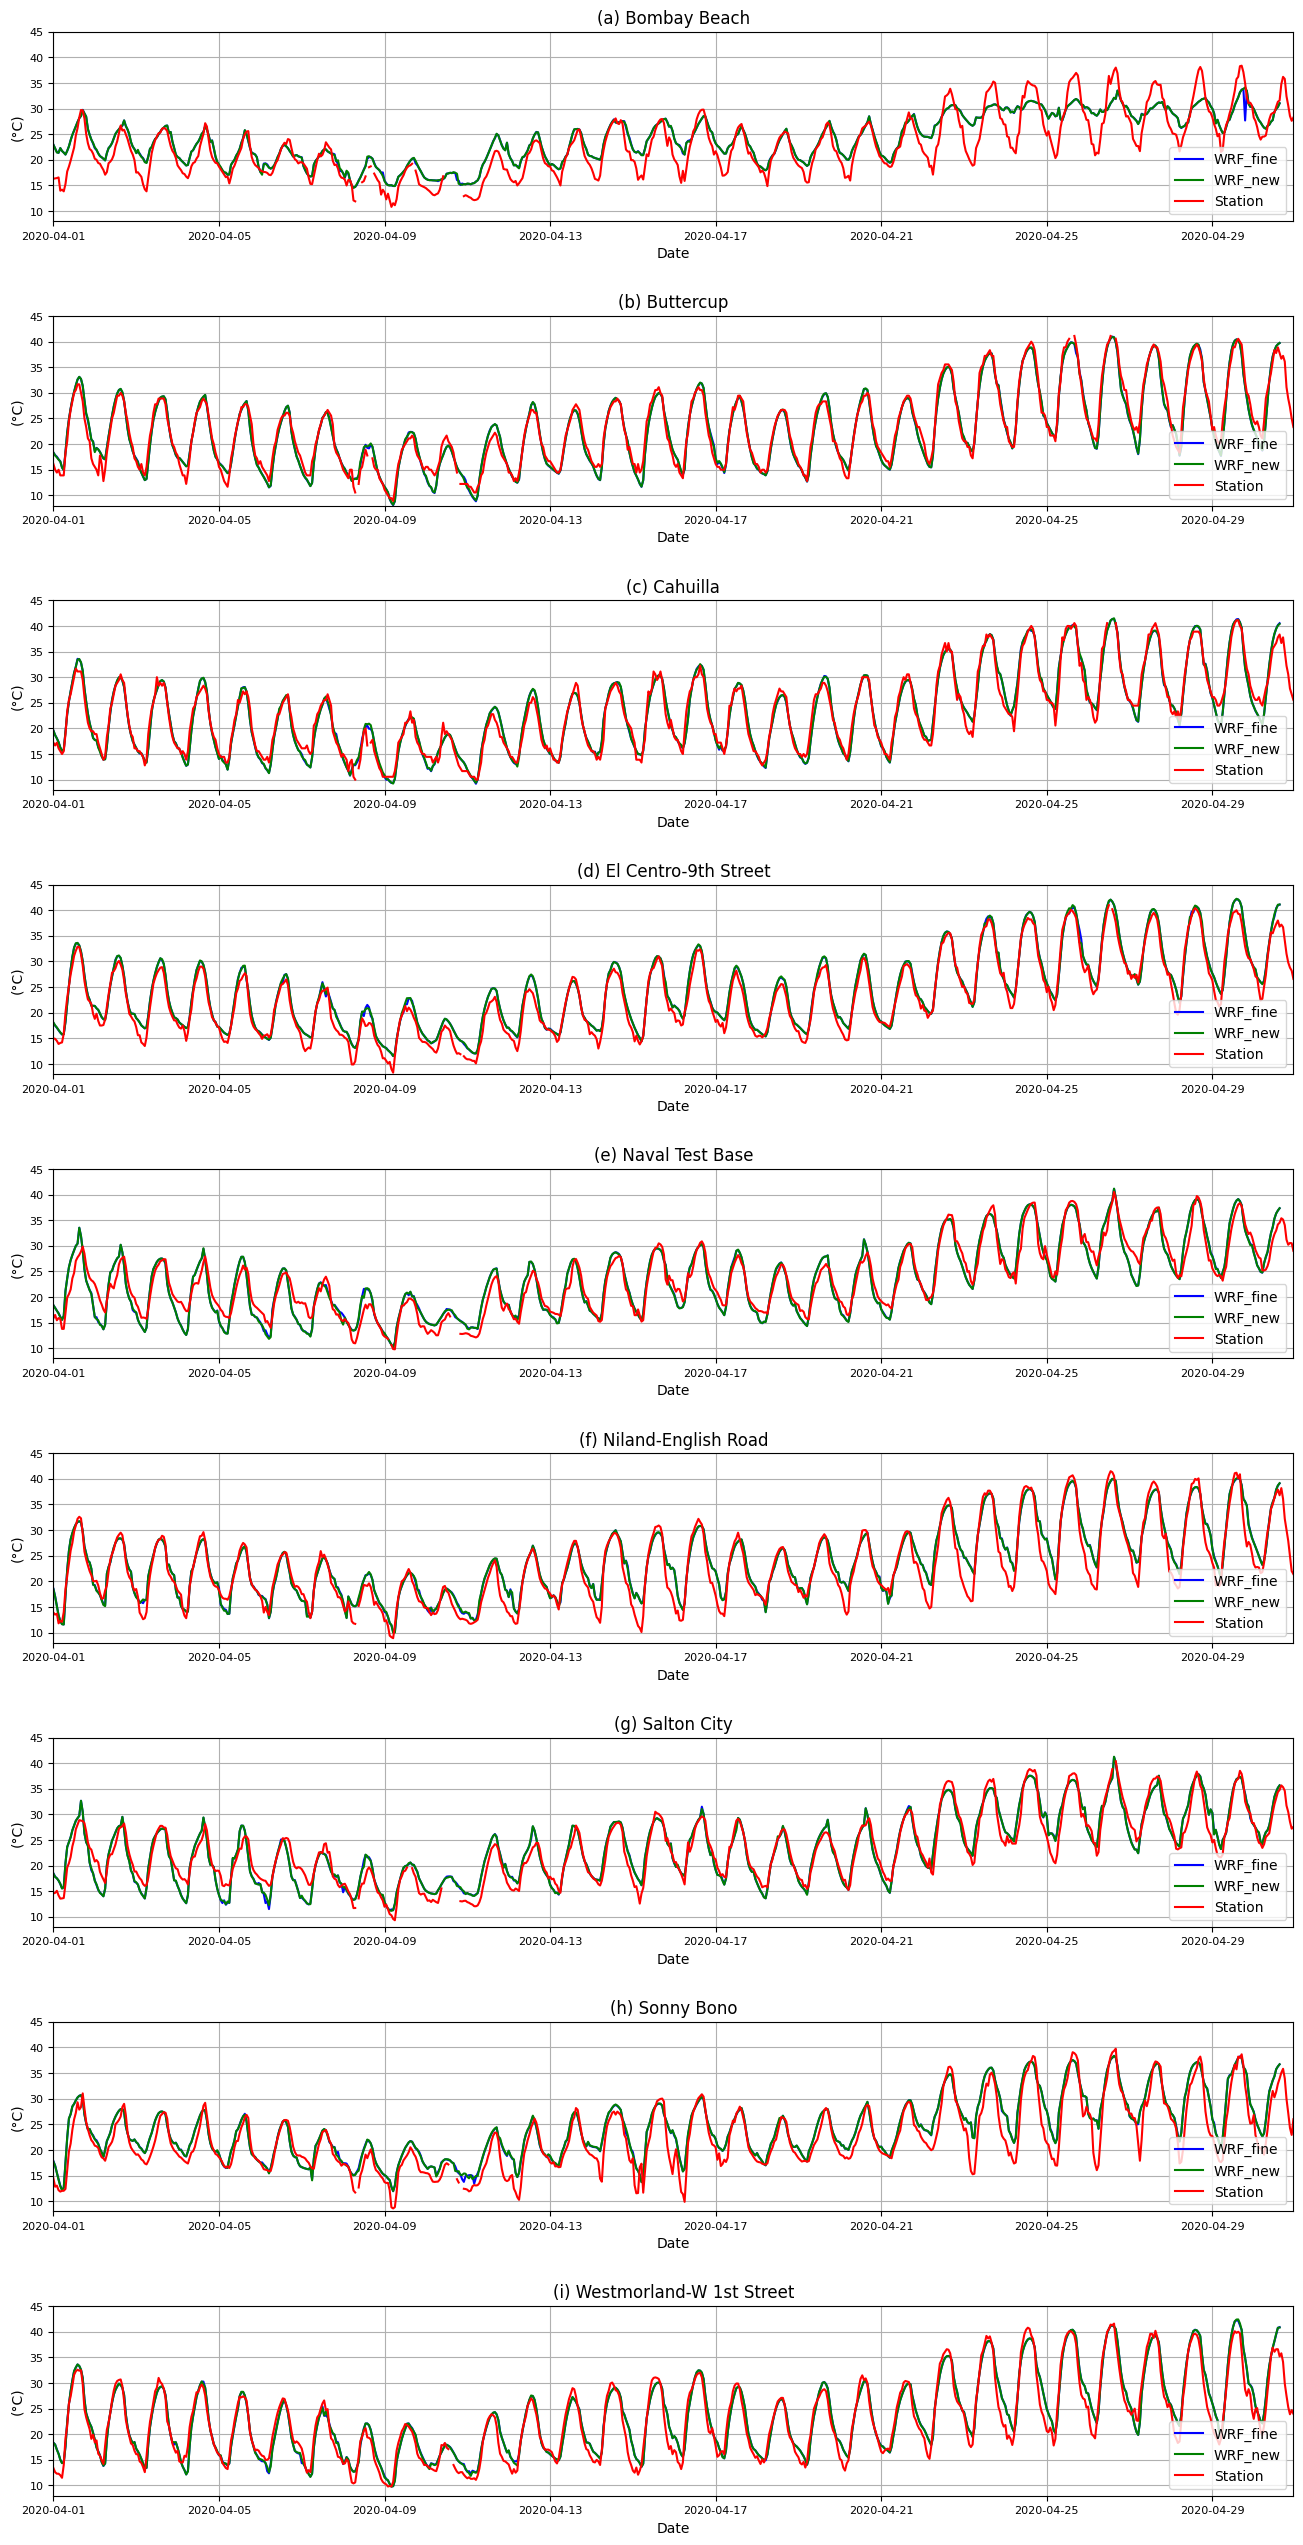

In [7]:
# plot comparision figures for all stations

import matplotlib.pyplot as plt
import numpy as np
# Select rows between April 1 and April 30, 2020
start_date = '2020-04-01'
end_date = '2020-04-30'

num_steps = 720
start_date = np.datetime64('2020-04-01 00:00')
end_date = np.datetime64('2020-04-30 23:00')
step_size = np.timedelta64(1, 'h')

dates = np.arange(start_date, end_date + step_size, step_size)


fig, axs = plt.subplots(9, 1, figsize=(16, 32))
plt.subplots_adjust(hspace=0.5)

# Extract station names for plotting

station_names = list(unique_stations.name)
del station_names[3], station_names[8] # delete Buttercup and Squaw lake


station_names

#station_names = ["Bombay Beach", "Buttercup", "Cahuilla", "El Centro-9th Street", "Naval Test Base", "Niland-English Road", "Salton City", "Sonny Bono", "Westmorland-W 1st Street"]

for i, ax in enumerate(axs):
    ax.plot(dates[:], np.ma.masked_invalid(closest_data_fine_new[i, :]), label='WRF_fine', marker='', linestyle='-', color='blue')
    ax.plot(dates[:], np.ma.masked_invalid(closest_data_sensor_new[i, :]), label='WRF_new', marker='', linestyle='-', color='green')
    ax.plot(dates[:], np.ma.masked_invalid(hourly_resampled_data_stns_array[i, :]), label='Station', marker='', linestyle='-', color='red')

    ax.set_title(f'({chr(ord("a") + i)}) {station_names[i]}')
    ax.set_xlabel('Date')
    ax.set_xlim([start_date, end_date])
    ax.tick_params(axis='x', labelrotation=0)
    ax.set_ylabel('(°C)')
    ax.tick_params(axis='both', labelsize=8)
    ax.grid(True)
    ax.legend(loc='lower right')
    ax.set_ylim(8, 45)

plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/timeseries_model_station.png', bbox_inches='tight', dpi=400)

plt.show()


In [ ]:
# Calculate pearson correlation using scipy

import numpy as np
from scipy import stats

# Lists to store results
all_model_fine_stn_r = []
all_model_fine_stn_p = []

for j in range(0, 9):
    valid_indices = ~np.isnan(closest_data_fine_new[j, :]) & ~np.isnan(hourly_resampled_data_stns_array[j, :])
    model_fine_stn_r, model_fine_stn_p = stats.pearsonr(closest_data_fine_new[j, valid_indices], hourly_resampled_data_stns_array[j, valid_indices])

    # Save results to lists
    all_model_fine_stn_r.append(model_fine_stn_r)
    all_model_fine_stn_p.append(model_fine_stn_p)

all_model_sensor_stn_r = []
all_model_sensor_stn_p = []

for j in range(0, 9):
    valid_indices = ~np.isnan(closest_data_sensor_new[j, :]) & ~np.isnan(hourly_resampled_data_stns_array[j, :])
    model_sensor_stn_r, model_sensor_stn_p = stats.pearsonr(closest_data_sensor_new[j, valid_indices], hourly_resampled_data_stns_array[j, valid_indices])

    # Save results to lists
    all_model_sensor_stn_r.append(model_sensor_stn_r)
    all_model_sensor_stn_p.append(model_sensor_stn_p)

all_model_sensor_stn_r

[0.9136923786700666,
 0.9813217693931113,
 0.9826661371279942,
 0.9897117808259331,
 0.9537897799866363,
 0.9602175129061986,
 0.954539263431686,
 0.9467551852812439,
 0.9701314699622388]

In [ ]:
# Calculate RMSE

import numpy as np
from sklearn.metrics import mean_squared_error

# RMSE is the standard deviation of the residuals

residuals_fine_stn = (closest_data_fine_new - hourly_resampled_data_stns_array)
rmse_fine_stn = np.nanstd(residuals_fine_stn, axis=1)
print(rmse_fine_stn.shape)

residuals_sensor_stn = (closest_data_sensor_new - hourly_resampled_data_stns_array)
rmse_sensor_stn = np.nanstd(residuals_sensor_stn, axis=1)
print(rmse_sensor_stn.shape)
rmse_sensor_stn


(9,)
(9,)


array([2.49399249, 1.42718918, 1.41558237, 1.06294863, 2.08569532,
       2.03168541, 1.97137767, 2.03930039, 1.83849479])

In [ ]:
# create a new dataframe by putting together all Rho and RMSE data against stations

corr_rmse_stations = pd.DataFrame({"Rho:WRF_fine": all_model_fine_stn_r, 'Rho:WRF_new': all_model_sensor_stn_r, 'P-value:WRF_fine': all_model_fine_stn_p, 'P-value:WRF_new': all_model_sensor_stn_p, 'RMSE:WRF_fine': rmse_fine_stn, 'RMSE:WRF_new': rmse_sensor_stn}, index=station_names)
corr_rmse_stations.index.name = 'Station'
corr_rmse_stations

,Rho:WRF_fine,Rho:WRF_new,P-value:WRF_fine,P-value:WRF_new,RMSE:WRF_fine,RMSE:WRF_new
Station,,,,,,
Bombay Beach,0.911580,0.913692,1.007691e-269,3.390119e-273,2.520133,2.493992
Buttercup,0.981116,0.981322,0.000000e+00,0.000000e+00,1.435380,1.427189
Cahuilla,0.983031,0.982666,0.000000e+00,0.000000e+00,1.402232,1.415582
El Centro-9th Street,0.989536,0.989712,0.000000e+00,0.000000e+00,1.072829,1.062949
Naval Test Base,0.954068,0.953790,0.000000e+00,0.000000e+00,2.074316,2.085695
Niland-English Road,0.959617,0.960218,0.000000e+00,0.000000e+00,2.047211,2.031685
Salton City,0.954001,0.954539,0.000000e+00,0.000000e+00,1.984737,1.971378
Sonny Bono,0.946755,0.946755,0.000000e+00,0.000000e+00,2.039672,2.039300
Westmorland-W 1st Street,0.969694,0.970131,0.000000e+00,0.000000e+00,1.850960,1.838495
